<a href="https://colab.research.google.com/github/bin010203/hello-world/blob/master/01_06%2B1%E6%A2%AF%E5%BA%A6%E4%B8%8B%E9%99%8D_%E7%B7%9A%E6%80%A7%E5%9B%9E%E6%AD%B8%E7%9A%84%E4%BF%82%E6%95%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 實作06：利用梯度下降法求簡單線性回歸的係數

### (0)掛載雲端硬碟

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### (1)import必要的套件

In [ ]:
import numpy as np
from IPython import display
import matplotlib.pyplot as plt
import matplotlib.font_manager as plt_font
twfont1 = plt_font.FontProperties(fname="/content/drive/MyDrive/Colab Notebooks/kaiu.ttf")

In [ ]:
import pandas as pd

### (2)將原始資料分為訓練資料集和驗證資料集

In [ ]:
#由SalesVolume.csv檔案載入資料集
data= np.loadtxt("/content/drive/MyDrive/Colab Notebooks/SalesVolume.csv",delimiter=",")


In [ ]:
data

array([[ 24.,  22.,  15.,   4.,   9.,  20.,   5.,   3.,  17.,  19.,  13.,
         10.,  12.,  11.,  16.,  27.,  16.,  16.,   6.,  20.],
       [591., 543., 410., 310., 319., 520., 338., 330., 501., 508., 399.,
        331., 390., 390., 431., 660., 409., 430., 323., 524.]])

In [ ]:
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,24.0,22.0,15.0,4.0,9.0,20.0,5.0,3.0,17.0,19.0,13.0,10.0,12.0,11.0,16.0,27.0,16.0,16.0,6.0,20.0
1,591.0,543.0,410.0,310.0,319.0,520.0,338.0,330.0,501.0,508.0,399.0,331.0,390.0,390.0,431.0,660.0,409.0,430.0,323.0,524.0


In [ ]:
#DataFrame隨機排序 frac=1傳回全部的項目,
#reset_index() 方法來重置 DataFrame 索引
#drop=True 選項防止將 index 新增為新的行(column)。
df_shuffled=df.sample(frac=1,axis=1).reset_index(drop=True)
df_shuffled

,17,13,10,11,6,16,18,2,5,9,14,8,12,1,19,3,4,15,7,0
0,16.0,11.0,13.0,10.0,5.0,16.0,6.0,15.0,20.0,19.0,16.0,17.0,12.0,22.0,20.0,4.0,9.0,27.0,3.0,24.0
1,430.0,390.0,399.0,331.0,338.0,409.0,323.0,410.0,520.0,508.0,431.0,501.0,390.0,543.0,524.0,310.0,319.0,660.0,330.0,591.0


In [ ]:
data = np.array(df_shuffled)

In [20]:
data

array([[ 16.,  11.,  13.,  10.,   5.,  16.,   6.,  15.,  20.,  19.,  16.,
         17.,  12.,  22.,  20.,   4.,   9.,  27.,   3.,  24.],
       [430., 390., 399., 331., 338., 409., 323., 410., 520., 508., 431.,
        501., 390., 543., 524., 310., 319., 660., 330., 591.]])

In [21]:
data_x=data[0]#第1列為廣告推播次數
data_y=data[1]#第2列為商品銷售數量
#訓練資料集12筆
train_x=data_x[:12]
train_y=data_y[:12]
#驗證資料集8筆
valid_x=data_x[12:]
valid_y=data_y[12:]


In [22]:
data_x

array([16., 11., 13., 10.,  5., 16.,  6., 15., 20., 19., 16., 17., 12.,
       22., 20.,  4.,  9., 27.,  3., 24.])

In [23]:
train_x

array([16., 11., 13., 10.,  5., 16.,  6., 15., 20., 19., 16., 17.])

In [24]:
valid_x

array([12., 22., 20.,  4.,  9., 27.,  3., 24.])

### (3)隨機初始化偏值b，權重w 

In [25]:
b=np.random.rand()
w=np.random.rand()
print("b = ",b ," w = ",w)

b =  0.4760824632332149  w =  0.3642028804994961


## (4)定義迴歸模型的線性函數

###偏值b，權重w(斜率)

In [26]:
def F(x):
  return b+w*x

## (5)定義損失函數LOSS Funcation

In [27]:
# L=1/2*(y-y^)**2
def Loss(x,y):
  return 0.5*np.sum((y-F(x))**2)

## (6)設定學習率和權重更新次數

In [28]:
ETA=0.0001#學習率
#儲存學習的狀態,# 偏值b，權重w(斜率)
Step_Loss=[]
Step_b=[]
Step_w=[]

## (7)開始訓練模型,看Loss值變化化圖形,for 迴圈可以改成13000~15000

In [29]:
# epoch 訓練的回合, ETA 學習率
# 偏值b，權重w(斜率)
for epoch in range(20000):
  b=b-ETA*np.sum(F(train_x)-train_y)
  w=w-ETA*np.sum((F(train_x)-train_y)*train_x)
            #跑100次才印一次,epoch從0開始,故+1,印太多會降低效率
  if epoch%100==99:
    current_loss=Loss(train_x,train_y)
    print("訓練次數:",epoch+1,"\nb:",b,"\nw:",w,
          "\n損失函數:",current_loss)
    Step_Loss.append(current_loss)
    Step_b.append(b)
    Step_w.append(w)
    #display.clear_output(wait=True)

訓練次數: 100 
b: 5.187890142414542 
w: 28.314841998435707 
損失函數: 37384.51267997351
訓練次數: 200 
b: 8.012027796165123 
w: 28.129065105222537 
損失函數: 36584.38515775445
訓練次數: 300 
b: 10.802147503293238 
w: 27.945525974182196 
損失函數: 35803.417300000656
訓練次數: 400 
b: 13.55865902452442 
w: 27.764197650520337 
損失函數: 35041.15031391695
訓練次數: 500 
b: 16.28196718484032 
w: 27.585053504115976 
損失函數: 34297.13639285195
訓練次數: 600 
b: 18.97247193293246 
w: 27.408067225619334 
損失函數: 33570.93845322642
訓練次數: 700 
b: 21.63056839993922 
w: 27.233212822588012 
損失函數: 32862.12987776126
訓練次數: 800 
b: 24.256646957475308 
w: 27.060464615669698 
損失函數: 32170.294264853805
訓練次數: 900 
b: 26.8510932749623 
w: 26.88979723483086 
損失函數: 31495.025183955713
訓練次數: 1000 
b: 29.414288376268498 
w: 26.721185615630898 
損失函數: 30835.92593680848
訓練次數: 1100 
b: 31.94660869566668 
w: 26.554604995541112 
損失函數: 30192.6093243963
訓練次數: 1200 
b: 34.44842613311774 
w: 26.390030910308052 
損失函數: 29564.69741947944
訓練次數: 1300 
b: 36.92010810888831 


### (8)畫圖檢查模型訓練結果

###def F(x)=b+w*x ,偏值b，權重w(斜率)

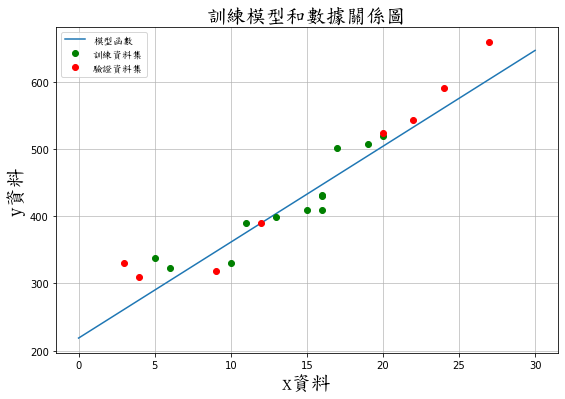

In [30]:
plt.figure(figsize=(9,6))
plt.title("訓練模型和數據關係圖",
          fontproperties=twfont1,fontsize=20) 
plt.xlabel("x資料",fontproperties=twfont1,fontsize=20) 
plt.ylabel("y資料",fontproperties=twfont1,fontsize=20)
x=np.linspace(0,30, 2000)
plt.plot(x, F(x),label="模型函數")
plt.plot(train_x, train_y, 'go',label="訓練資料集")
plt.plot(valid_x, valid_y, 'ro',label="驗證資料集")
plt.legend(prop=twfont1)
plt.grid('k-', alpha=0.8)
plt.show()

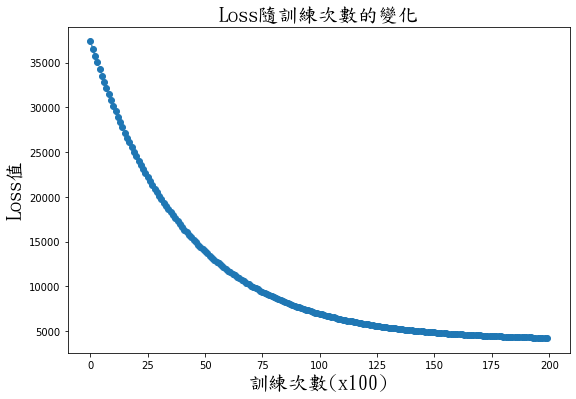

In [31]:
plt.figure(figsize=(9,6))
plt.title("Loss隨訓練次數的變化",fontproperties=twfont1,fontsize=20) 
plt.xlabel("訓練次數(x100)",fontproperties=twfont1,fontsize=20) 
plt.ylabel("Loss值",fontproperties=twfont1,fontsize=20)
plt.plot(Step_Loss,":o")
plt.show()

### (9)觀察Loss值隨訓練次數的變化

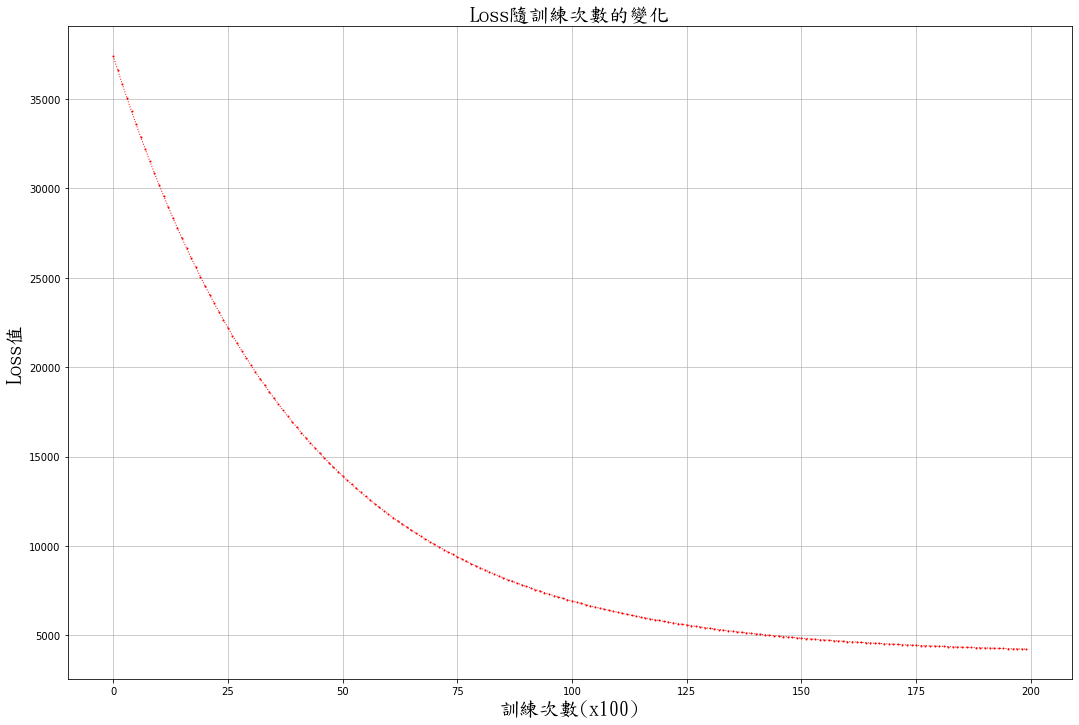

In [32]:
plt.figure(figsize=(18,12))
plt.title("Loss隨訓練次數的變化",fontproperties=twfont1,fontsize=20) 
plt.xlabel("訓練次數(x100)",fontproperties=twfont1,fontsize=20) 
plt.ylabel("Loss值",fontproperties=twfont1,fontsize=20)
plt.plot(Step_Loss,"r:o",lw=1, ms=1)
plt.grid('k-', alpha=0.8)
plt.show()

### (10)比較訓練好的迴歸模型函數在訓練資料集和驗證資料集的每筆平均Loss值

In [33]:
print("訓練資料集對回歸模型的每筆平均Loss值",
      Loss(train_x, train_y)/np.size(train_x))
print("驗證資料集對回歸模型的每筆平均Loss值",
      Loss(valid_x, valid_y)/np.size(valid_x))

訓練資料集對回歸模型的每筆平均Loss值 353.2534938642868
驗證資料集對回歸模型的每筆平均Loss值 699.0388268158149


In [34]:
#I stop Runall

### (11)動畫顯示偏值b和權重w的移動路徑

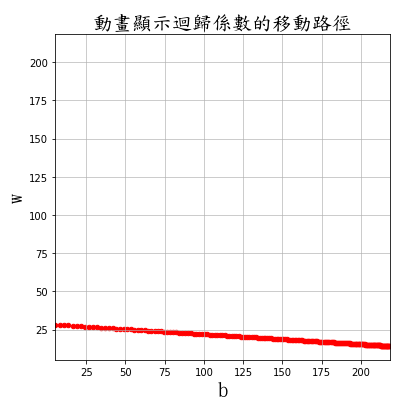

In [35]:
for i in range(len(Step_b)):
    plt.figure(figsize=(6,6))
    plt.title("動畫顯示迴歸係數的移動路徑",
              fontproperties=twfont1,fontsize=20)
    plt.xlabel("b",fontproperties=twfont1,fontsize=20) 
    plt.ylabel("w",fontproperties=twfont1,fontsize=20) 
    # X軸、Y軸刻度取array([Step_b,Step_w])的極值
    plt.xlim(np.min(np.array([Step_b,Step_w])),
             np.max(np.array([Step_b,Step_w])))
    plt.ylim(np.min(np.array([Step_b,Step_w])),
             np.max(np.array([Step_b,Step_w])))
    plt.scatter(Step_b[:i], Step_w[:i], s=20,color='r')
    plt.grid('k-', alpha=0.8)
    plt.pause(0.1)
    display.clear_output(wait=True)

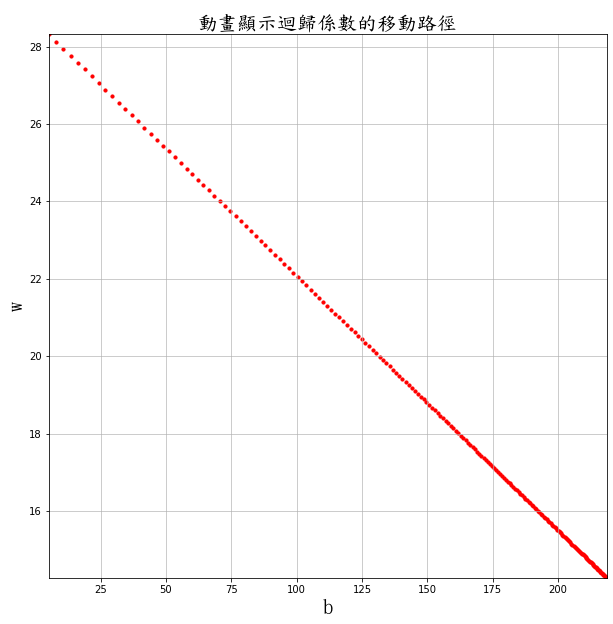

In [36]:
for i in range(len(Step_b)):
    plt.figure(figsize=(10,10))
    plt.title("動畫顯示迴歸係數的移動路徑",
              fontproperties=twfont1,fontsize=20)
    plt.xlabel("b",fontproperties=twfont1,fontsize=20) 
    plt.ylabel("w",fontproperties=twfont1,fontsize=20) 
    # X軸、Y軸刻度取array([Step_b,Step_w])的極值
    plt.xlim(np.min(np.array(Step_b)),
             np.max(np.array(Step_b)))
    plt.ylim(np.min(np.array(Step_w)),
             np.max(np.array(Step_w)))
    plt.scatter(Step_b[:i], Step_w[:i], s=10,color='r')
    plt.grid('k-', alpha=0.8)
    plt.pause(0.1)
    display.clear_output(wait=True)

### (12)顯示迴歸係數在損失函數等高線分布圖的移動路徑

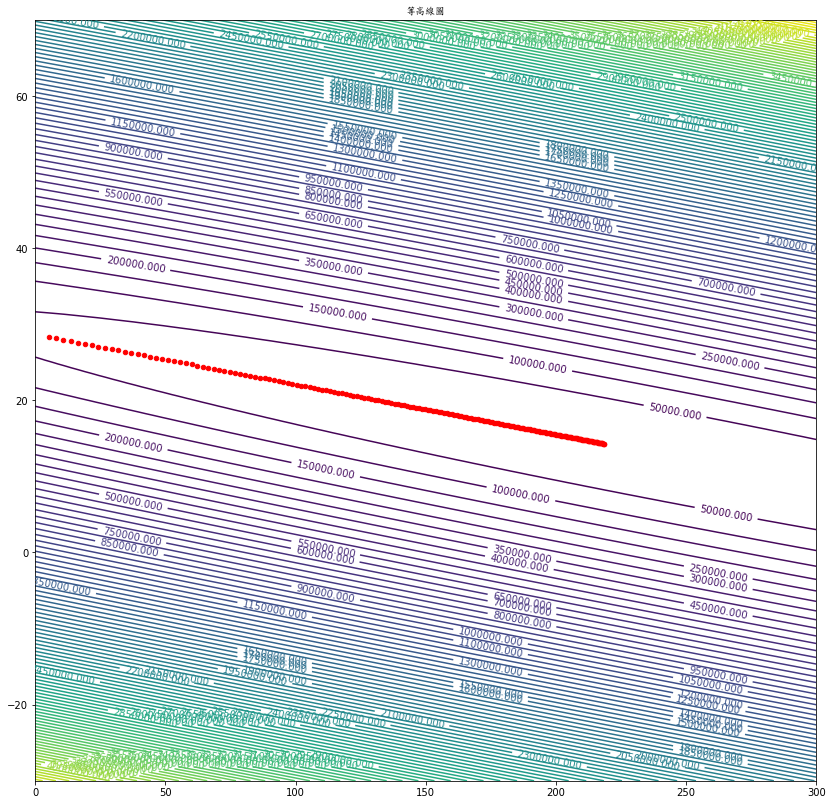

In [37]:
#取b和w的網格範圍
b=np.linspace(0,300,200)
w=np.linspace(-30,70,200)
#計算每一個網格點對應的損失函數值
L=np.zeros((200,200)) 
for i in range(200):
  for j in range(200):
    L[j][i]=0.5*np.sum((train_y-(b[i]+w[j]*train_x))**2)
#鋪設網格
b,w=np.meshgrid(b,w)
# 開啟繪圖區域
plt.figure(figsize=(14,14))
CS=plt.contour(b,w,L,100)
plt.clabel(CS,inline=1,fontsize=10)
plt.scatter(Step_b[0:], Step_w[0:], s=20,color='r')
plt.title('等高線圖',fontproperties=twfont1)
plt.show()

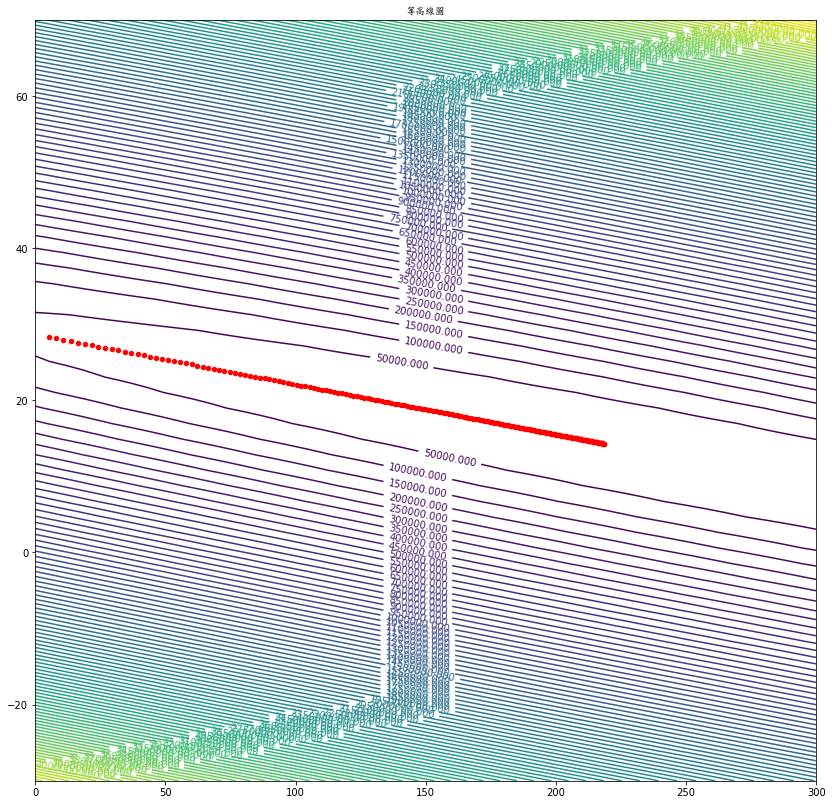

In [38]:
#取b和w的網格範圍
b=np.linspace(0,300,50)
w=np.linspace(-30,70,50)
#計算每一個網格點對應的損失函數值
L=np.zeros((50,50)) 
for i in range(50):
  for j in range(50):
    L[j][i]=0.5*np.sum((train_y-(b[i]+w[j]*train_x))**2)
#鋪設網格
b,w=np.meshgrid(b,w)
# 開啟繪圖區域
plt.figure(figsize=(14,14))
CS=plt.contour(b,w,L,100)
plt.clabel(CS,inline=1,fontsize=10)
plt.scatter(Step_b[0:], Step_w[0:], s=20,color='r')
plt.title('等高線圖',fontproperties=twfont1)
plt.show()